In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

In [14]:
def fit_sin(tt, yy):
    ## Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  
        return A * np.sin(w*t + p) + c

    popt, pcov = optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f,
            "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

In [6]:
df = pd.read_csv("C:\\Users\\Gordon Cheung\\OneDrive - Imperial College London\\1.Imperial\\Year_4\\Optimisation\\Coursework\\Code\\Data\\energy_consumption.csv")
df['hour']=df['Day']*24
print(df)

     Day  Power  Power (adjusted)   hour
0      0  29.89        416.868127      0
1     31  26.98        376.283107    744
2     59  27.97        390.090382   1416
3     90  24.78        345.600274   2160
4    120  24.67        344.066132   2880
5    151  23.38        326.074835   3624
6    181  24.13        336.534891   4344
7    212  23.58        328.864183   5088
8    243  24.04        335.279685   5832
9    273  25.95        361.917962   6552
10   304  26.70        372.378019   7296
11   334  28.62        399.155764   8016
12   365  29.87        416.589192   8760
13   396  27.37        381.722336   9504
14   424  28.35        395.390144  10176
15   455  25.18        351.178971  10920
16   485  24.75        345.181871  11640
17   516  23.44        326.911639  12384
18   546  24.48        341.416251  13104
19   577  23.55        328.445781  13848
20   608  24.23        337.929565  14592
21   638  25.58        356.757668  15312
22   669  26.82        374.051628  16056
23   699  27.20 

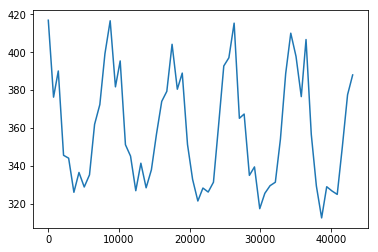

In [12]:
plt.plot(df['hour'],df['Power (adjusted)'])

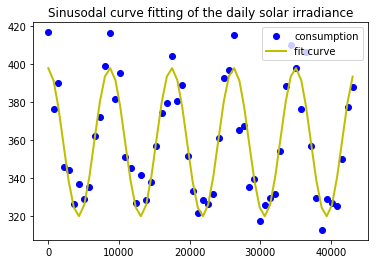

In [21]:
# fit a surrogate model onto the daily average to simplify the algorithm
tt = df['hour']
solar_daily = fit_sin(df['hour'], df['Power (adjusted)'])
#print( "Amplitude=%(amp)s \n Angular freq.=%(omega)s \n phase=%(phase)s, \
#      \n offset=%(offset)s \n Max. Cov.=%(maxcov)s" % solar_daily )
#solar_daily_fit = solar_daily["A"]*sym.sin(solar_daily["w"]*t+solar_daily["b"])+solar_daily["c"]


# print(sym.diff(solar_daily["fitfunc"],t))
plt.figure()
plt.title("Sinusodal curve fitting of the daily solar irradiance")
plt.plot(df['hour'], df['Power (adjusted)'], "ob", label="consumption", linewidth=2)
plt.plot(df['hour'], solar_daily["fitfunc"](tt), "y-", label="fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()